## **Load python required libraries**

In [22]:
import numpy as np

import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm1
from matplotlib import patches
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats

from google.colab import drive

# Mount your Drive folder to access the dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Set the random seed**

In [23]:
seed = 1234 * 1

random.seed(seed)
np.random.seed(seed)

## **Definition of k_means class**

In [24]:
class k_means:
    def __init__(self, k, tol_centroids):
        #Model initialization
        self.k = k #Numbers of clusters to identify
        self.tol_centroids = tol_centroids #Tolerance for the change in the positions of centroids between consecutive clustering iterations

        return ;

    def random_centroid__init(self, data, seed):
        #Random initialization of centroids
        random.seed(seed)
        np.random.seed(seed)

        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[np.random.randint(data.shape[0]), :]

        return ;

    def plot_clusters(self, data, iteration):
        clear_output(wait = True)

        #Plot the clusters at the given iteration
        plt.figure(0, figsize=(9,9))

        cm = plt.cm.get_cmap('jet')

        #Plot clusters
        cluster_labels = np.zeros(data.shape[0], dtype = int)
        for classification in self.classifications:
            for index in self.classifications_ind[classification]:
                cluster_labels[index] = classification

        plt.scatter(data[:, 0], data[:, 1], s = 200, c = cluster_labels, cmap = cm, edgecolors = "black", linewidths = 1.5)

        cbar=plt.colorbar()
        cbar.ax.tick_params(labelsize=30)
        cbar.ax.set_title(r'$\bf{C_{k}}$', fontsize = 30, fontweight='bold', rotation=0, pad = 23)

        #Plot centroids
        for centroid in model.centroids:
            if centroid == 0:
              plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                        marker="X",  s = 2000, color="black", linewidth=0.1, label = r'$\bf{m_{k}}$')
            else:
              plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                        marker="X",  s = 2000, color="black", linewidth=0.1)

        plt.tick_params(axis='both', which='major', labelsize=30)
        plt.xlabel(r'$\bf{Δc_{L,norm}}$', fontsize = 30, labelpad = 6)
        plt.ylabel(r'$\bf{α_{norm}}$', fontsize = 30, labelpad = 6)
        plt.legend(fontsize = 30)
        plt.title('Iteration %d' %iteration, fontsize = 30, fontweight = 'bold')

        plt.show()

        return ;

    def fit(self, data, max_iter):
        #Model fitting
        for iteration in range(max_iter):
            self.classifications = {} #Dictionary that stores the lists of the data points' input features assigned to a certain cluster.
                                      #Each element corresponds to list for a different cluster.
            self.classifications_ind = {} #Dictionary that stores the lists of the data points' indexes assigned to a certain cluster.
                                          #Each element corresponds to list for a different cluster.

            #Initialization of "self.classifications" and "self.classifications_ind" variables. This happens in the beginning of each clustering iteration
            for j in range(self.k):
                self.classifications[j] = []
                self.classifications_ind[j] = []

            #Assignemnt of data points to clusters based on their euclidean distance from the centroids.
            for j, featureset in enumerate(data):
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]

                classification = distances.index(min(distances))

                self.classifications[classification].append(featureset)
                self.classifications_ind[classification].append(j)

            prev_centroids = dict(self.centroids) #Variable that stores the previous position of centroids

            #Update of centroids
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            #Plot the clusters at the given iteration
            self.plot_clusters(data, iteration)

            #Check for convergence of centroids' position
            optimized = True

            for centroid in self.centroids:
                original_centroid = prev_centroids[centroid]
                current_centroid = self.centroids[centroid]

                if np.linalg.norm(current_centroid-original_centroid) > self.tol_centroids:
                    optimized = False
                    break

            if optimized:
                break

                return ;

        return ;

    def predict(self, data):
        #Use the model to identify clusters in new data
        classifications_pred = {} #Dictionary that stores the lists of the data points' input features assigned to a certain cluster.
                                  #Each element corresponds to list for a different cluster.

        classifications_ind_pred = {} #Dictionary that stores the lists of the data points' indexes assigned to a certain cluster.
                                      #Each element corresponds to list for a different cluster.

        #Initialization of "self.classifications" and "self.classifications_ind" variables.
        for i in range(self.k):
            classifications_pred[i] = []
            classifications_ind_pred[i] = []

        for i, featureset in enumerate(data):
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]

            classification = distances.index(min(distances))

            classifications_pred[classification].append(featureset)
            classifications_ind_pred[classification].append(i)

        return classifications_pred, classifications_ind_pred

## **Specify the path to the dataset.**

In [25]:
#In this case they are stored in a folder inside the Colab Notebooks folder of Google drive.
path = '/content/drive/My Drive/Colab Notebooks/PIC/'

data_vel_all = np.loadtxt('{}wavespeed.txt'.format(path)) #Wave speed measurement
data_att_all = np.loadtxt('{}attenuation.txt'.format(path)) #Attenuation measurement
data_porosity_all = np.loadtxt('{}porosity.txt'.format(path)) #Corresponding porosity levels for each wave speed/attenuation measurement

## **Select porosity levels from the dataset.**

<ipython-input-26-5e6b18378675>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


Text(1777.281045751634, 0.5, 'Attenuation (1/m)')

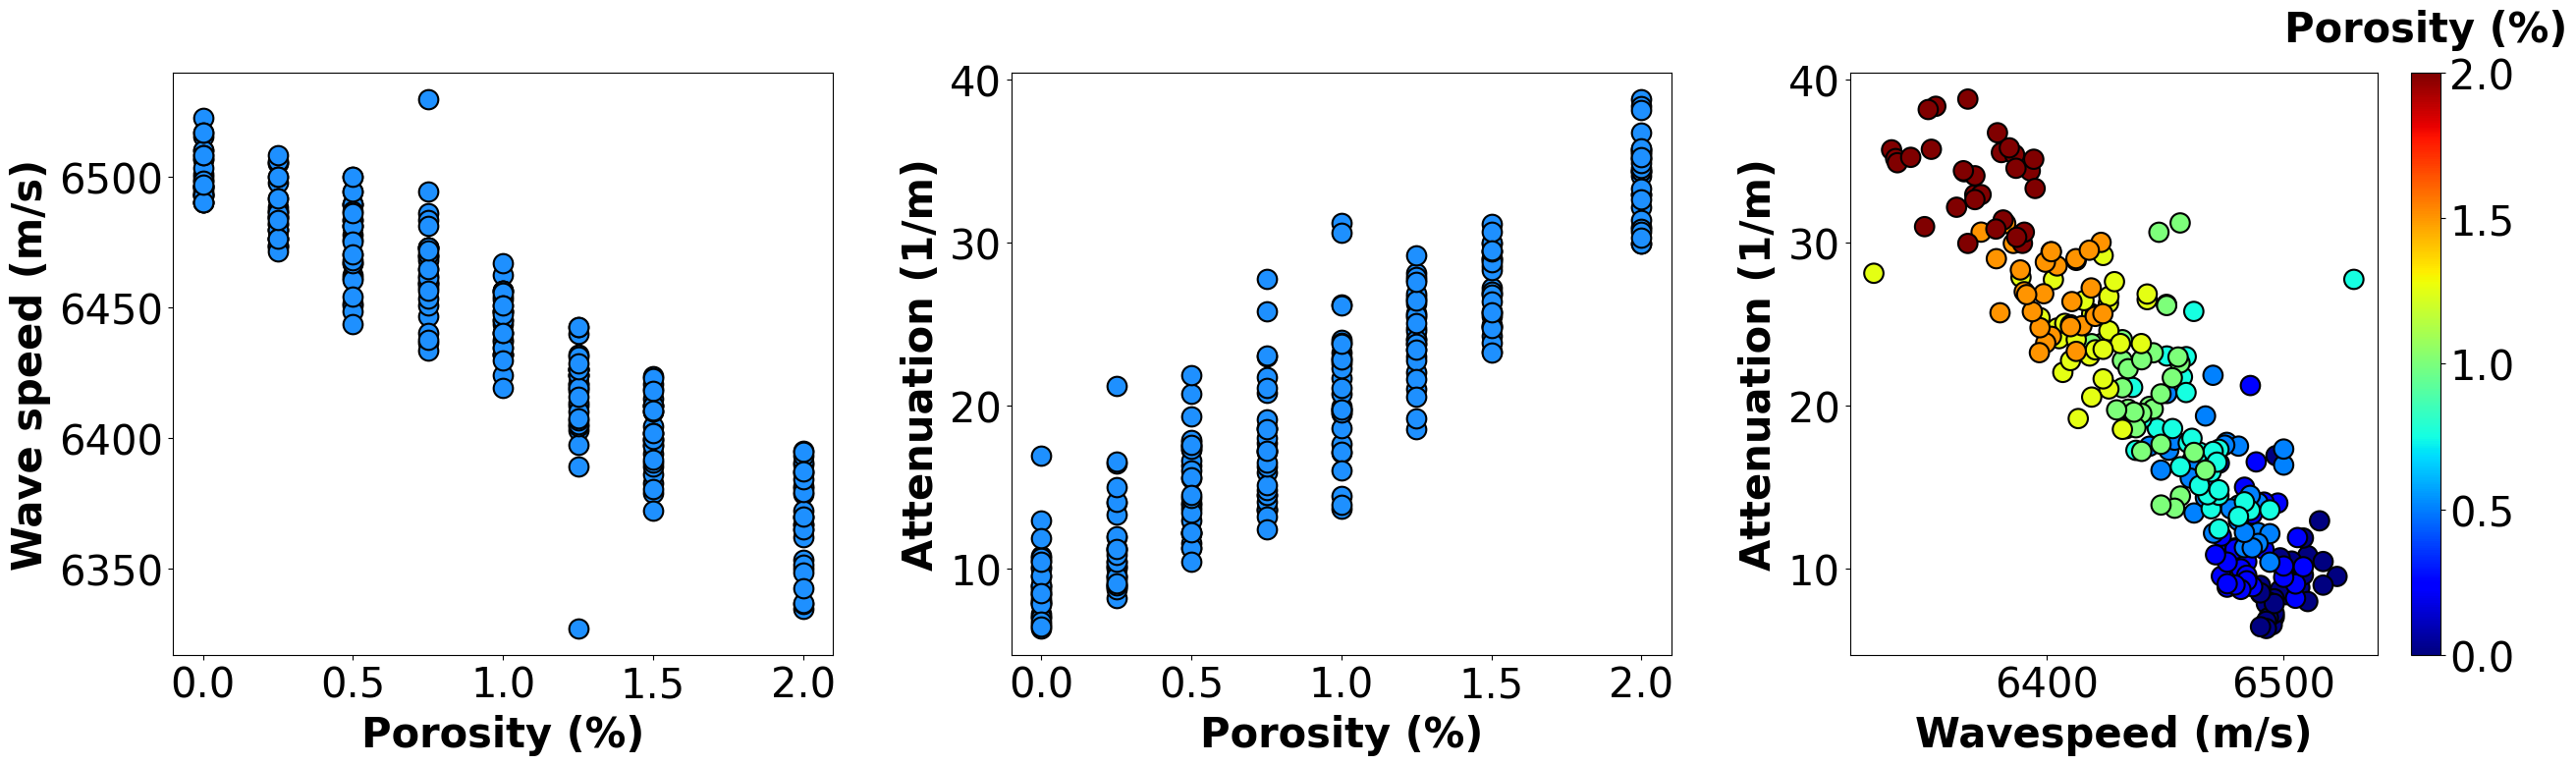

In [26]:
# If you want to select all the porosity levels. set the variable "selected_porosity_levels" to [0, 1, 2, 3, 4, 5, 6, 7].
#If you want just the first two and the last set "selected_porosity_levels" to [0, 1, 7] instead.
data_vel = data_vel_all.copy()
data_att = data_att_all.copy()
data_porosity = data_porosity_all.copy()

selected_porosity_levels = [0, 1, 2, 3, 4, 5, 6, 7]
selected_porosity_levels_indices = []
for i in range(data_vel.shape[0]):
    for j in range(len(selected_porosity_levels)):
        if np.floor(i / 30) == selected_porosity_levels[j]:
            selected_porosity_levels_indices.append(i)
            break

data_vel = data_vel[selected_porosity_levels_indices]
data_att = data_att[selected_porosity_levels_indices]
data_porosity = data_porosity[selected_porosity_levels_indices]

#Plot measurements
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(27, 9)
fig.tight_layout(pad = 10)

#Wave speed vs porosity
ax[0].scatter(data_porosity, data_vel, s = 200, color = 'dodgerblue', edgecolors = "black", linewidths = 1.5)

ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[0].set_xlabel('Porosity (%)', fontsize = 30, fontweight='bold', labelpad = 6)
ax[0].set_ylabel('Wave speed (m/s)', fontsize = 30, fontweight='bold', labelpad = 6)

#Attenuation vs porosity
ax[1].scatter(data_porosity, data_att, s = 200, color = 'dodgerblue', edgecolors = "black", linewidths = 1.5)

ax[1].tick_params(axis='both', which='major', labelsize=30)
ax[1].set_xlabel('Porosity (%)', fontsize = 30, fontweight='bold', labelpad = 6)
ax[1].set_ylabel('Attenuation (1/m)', fontsize = 30, fontweight='bold', labelpad = 6)

#Wave speed-Attenuation vs porosity
cm = plt.cm.get_cmap('jet')

im = ax[2].scatter(data_vel, data_att, s = 200, c = data_porosity, cmap = cm, edgecolors = "black", linewidths = 1.5)

cbar = fig.colorbar(im, ax=ax[2])
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_title('Porosity (%)', fontsize = 30, fontweight='bold', rotation=0, pad = 23)

ax[2].tick_params(axis='both', which='major', labelsize=30)
ax[2].set_xlabel('Wavespeed (m/s)', fontsize = 30, fontweight='bold', labelpad = 6)
ax[2].set_ylabel('Attenuation (1/m)', fontsize = 30, fontweight='bold', labelpad = 6)

## **Map porosity levels to porosity labels between 0 and 7.**

In [27]:
#This step is required for the evaluation of the clustering performance.
porosity_values = np.unique(data_porosity)
data_porosity_label = np.zeros(len(data_porosity), dtype = int)
for i in range(data_porosity.shape[0]):
    data_porosity_label[i] = np.where(porosity_values == data_porosity[i])[0][0]

## **Trasnformation of measurements to input features**

<ipython-input-28-7e88eaa3519b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


Text(0, 0.5, '$\\bf{α_{norm}}$')

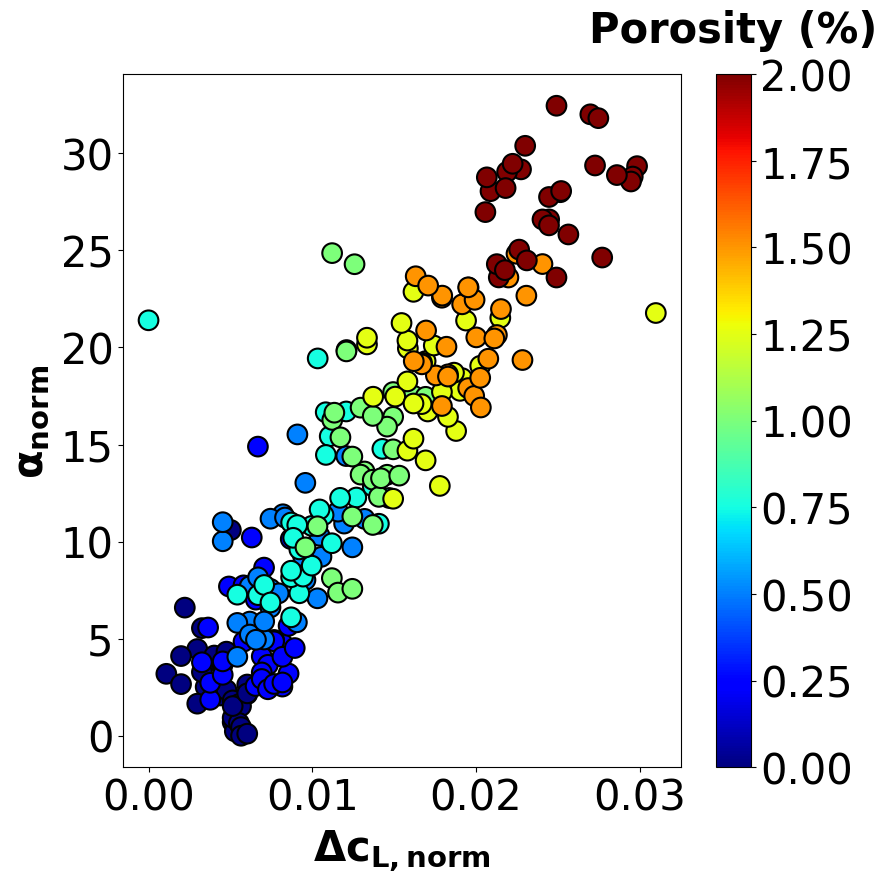

In [28]:
#Tranforsm wave speed measurements to the first input feature denoted as DcL
c_L = np.max(data_vel)
DcL =  (c_L-data_vel)/c_L

#Tranforsm attenuation measurements to the second input feature denoted as a
a = data_att - np.min(data_att)

#Assemble input feature array denoted as X
X = np.append(DcL.reshape(-1, 1), a.reshape(-1, 1), axis=1)

#Plot dataset
plt.figure(0, figsize = (9, 9))
ax = plt.axes()

cm = plt.cm.get_cmap('jet')

plt.scatter(X[:, 0], X[:, 1], s = 200, c = data_porosity, cmap = cm, edgecolors = "black", linewidths = 1.5)

cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_title('Porosity (%)', fontsize = 30, fontweight='bold', rotation=0, pad = 23)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel(r'$\bf{Δc_{L,norm}}$', fontsize = 30, labelpad = 6)
plt.ylabel(r'$\bf{α_{norm}}$', fontsize = 30, labelpad = 6)

## **Split the data and the the true porosity levels and labels into a training and a testing set.**

In [29]:
#In this case the variable "split" is set to 0.2, indicating that 20% of the data are used to form the testing set.
split = 0.2
X_train, X_test, data_porosity_label_train, data_porosity_label_test, data_porosity_train, data_porosity_test = train_test_split(X, data_porosity_label, data_porosity, test_size = split, random_state = seed, shuffle=True)

## **Scaling of the input features in the training set and the testing set between 0 to 1, based on the min-max values from the training set.**

<ipython-input-30-c0cd1acde3bb>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')
<ipython-input-30-c0cd1acde3bb>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


Text(0.5, 1.0, 'Testing set')

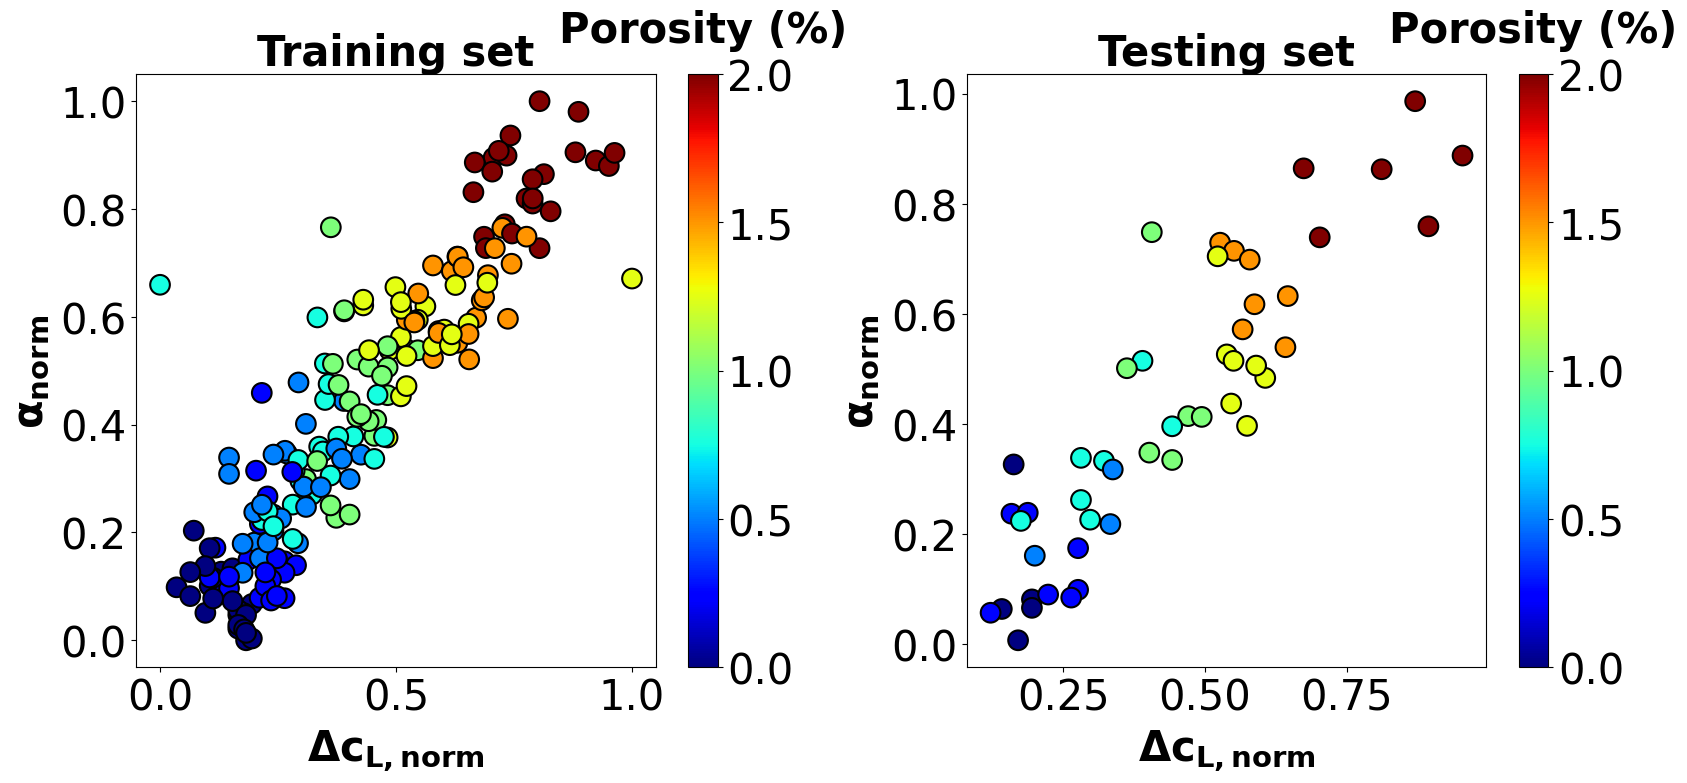

In [30]:
mmax = X_train.max(axis = 0)

X_train = X_train / mmax
X_test = X_test / mmax

#Plot the training set and the the testing set.
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(18, 9)
fig.tight_layout(pad = 10)

#Training set
cm = plt.cm.get_cmap('jet')

im1= ax[0].scatter(X_train[:, 0], X_train[:, 1], s = 200, c = data_porosity_train, cmap = cm, edgecolors = "black", linewidths = 1.5)

cbar1 = fig.colorbar(im1, ax=ax[0])
cbar1.ax.tick_params(labelsize=30)
cbar1.ax.set_title('Porosity (%)', fontsize = 30, fontweight='bold', rotation=0, pad = 23)

ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[0].set_xlabel(r'$\bf{Δc_{L,norm}}$', fontsize = 30, labelpad = 6)
ax[0].set_ylabel(r'$\bf{α_{norm}}$', fontsize = 30, labelpad = 6)
ax[0].set_title('Training set', fontsize = 30, fontweight='bold')

#Testing set
cm = plt.cm.get_cmap('jet')

im2 = ax[1].scatter(X_test[:, 0], X_test[:, 1], s = 200, c = data_porosity_test, cmap = cm, edgecolors = "black", linewidths = 1.5)

cbar2 = fig.colorbar(im2, ax=ax[1])
cbar2.ax.tick_params(labelsize=30)
cbar2.ax.set_title('Porosity (%)', fontsize = 30, fontweight='bold', rotation=0, pad = 23)

ax[1].tick_params(axis='both', which='major', labelsize=30)
ax[1].set_xlabel(r'$\bf{Δc_{L,norm}}$', fontsize = 30, labelpad = 6)
ax[1].set_ylabel(r'$\bf{α_{norm}}$', fontsize = 30, labelpad = 6)
ax[1].set_title('Testing set', fontsize = 30, fontweight='bold')

## **Model parameters**

In [31]:
k = 8 #Numbers of clusters to identify
tol_centroids  = 1e-4 #Tolerance for the change in the positions of centroids between consecutive clustering iterations

## **Model initialization**

In [32]:
model = k_means(k, tol_centroids)

## **Random centroid initialization**

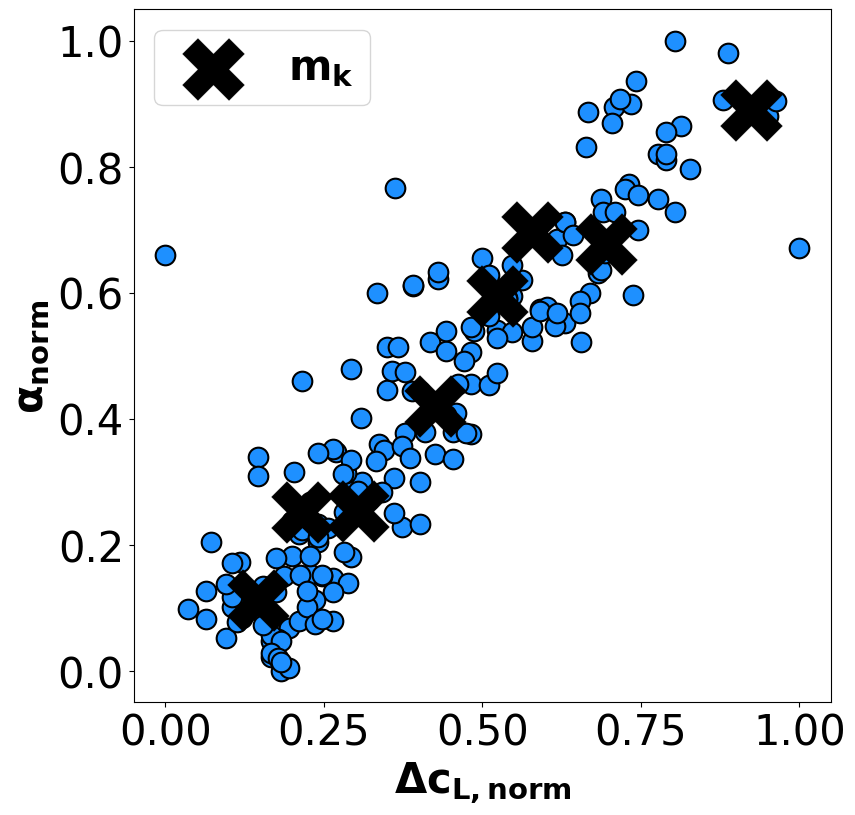

In [33]:
model.random_centroid__init(X_train, seed)

#Plot the initial position of centroids. The centroids are denoted as mk.
fig = plt.figure(0, figsize = (9, 9))

plt.scatter(X_train[:,0], X_train[:,1], s = 200, color = 'dodgerblue', edgecolors = "black", linewidths = 1.5)

for centroid in model.centroids:
    if centroid == 0:
      plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="X",  s = 2000, color="black", linewidth=0.1, label = r'$\bf{m_{k}}$')
    else:
      plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="X",  s = 2000, color="black", linewidth=0.1)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel(r'$\bf{Δc_{L,norm}}$', fontsize = 30)
plt.ylabel(r'$\bf{α_{norm}}$', fontsize = 30, fontweight='bold')
plt.legend(fontsize = 30)

## **Model fitting**

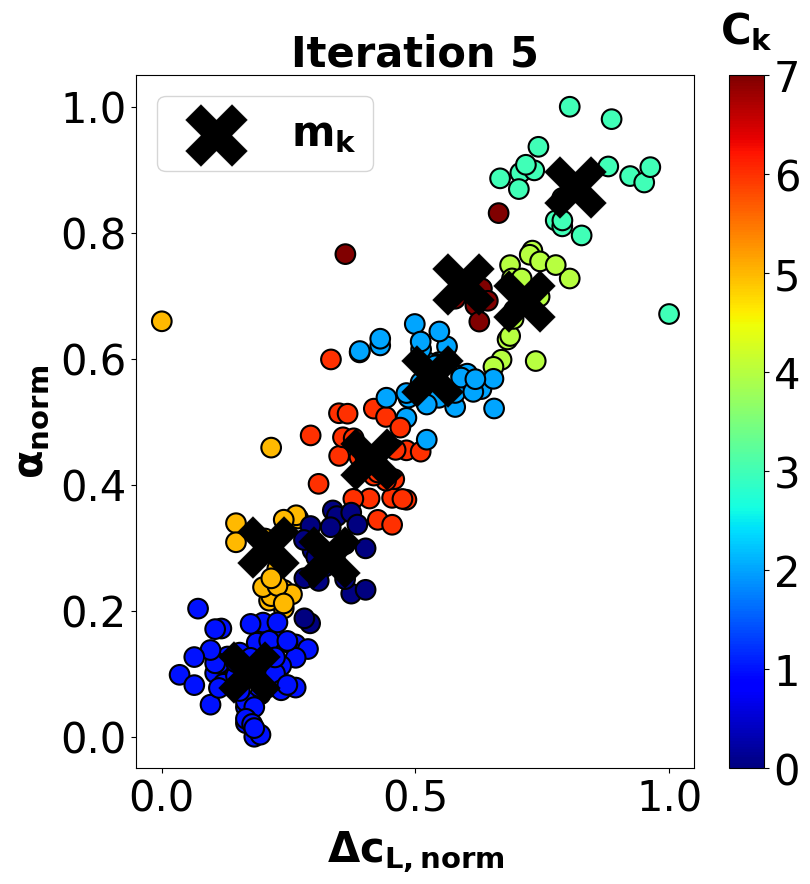

In [34]:
max_iter = 100 #Number of maximum clustering iterations
model.fit(X_train, max_iter)

## **Relabelling of data points**

In [35]:
porosity_values_label = np.unique(data_porosity_label_train) #Variable that stores unique values of the true porosity labels (0-7) from the training set

porosity_values_propability = np.zeros((model.k, porosity_values_label.shape[0])) #Variable that stores in each row the probability of a cluster corresponding to a true porosity label
for classification in model.classifications:
    unique_values, counts = np.unique(data_porosity_label_train[model.classifications_ind[classification]], return_counts = True)
    for i in range(porosity_values_label.shape[0]):
        if len(np.where(unique_values == porosity_values_label[i])[0]) > 0:
          index = np.where(unique_values == porosity_values_label[i])[0][0]
          porosity_values_propability[classification, porosity_values_label[i]] = counts[index] / len(data_porosity_label_train[data_porosity_label_train == porosity_values_label[i]])
        else:
          porosity_values_propability[classification, porosity_values_label[i]] = 0

most_propable_true_clusters = []
for i in range(model.k):
    most_propable_true_clusters.append(np.flip(np.argsort(porosity_values_propability[i, :])))

most_propable_true_clusterss = []
index_most_propable_true_clusterss = []
for i in range(model.k):
    most_propable_true_clusterss.append(most_propable_true_clusters[i][0])
    index_most_propable_true_clusterss.append(0)

while 1:
  unique_valuess, countss = np.unique(most_propable_true_clusterss, return_counts = True)

  if len(unique_valuess) == model.k:
    break
  else:
    for i in range(len(unique_valuess)):
        if countss[i] > 1:
          indices = np.where(most_propable_true_clusterss == unique_valuess[i])[0]

          qq = np.argsort(porosity_values_propability[indices, unique_valuess[i]])

          most_propable_true_clusterss[indices[qq[0]]] = most_propable_true_clusters[indices[qq[0]]][index_most_propable_true_clusterss[indices[qq[0]]] + 1]

          index_most_propable_true_clusterss[indices[qq[0]]] = index_most_propable_true_clusterss[indices[qq[0]]] + 1

          break

#Relabelling of clusters for a consistent comparison with the true porosity labels
classifications_new = dict.fromkeys(list(range(model.k)), None)
classifications_ind_new = dict.fromkeys(list(range(model.k)), None)
centroids_new = dict.fromkeys(list(range(model.k)), None)

for i in range(model.k):
    classifications_new[most_propable_true_clusterss[i]] = model.classifications[i]
    classifications_ind_new[most_propable_true_clusterss[i]] = model.classifications_ind[i]
    centroids_new[most_propable_true_clusterss[i]] = model.centroids[i]

model.classifications = classifications_new.copy()
model.classifications_ind = classifications_ind_new.copy()
model.centroids = centroids_new.copy()

## **Plot predicted clusters vs true clusters**

<ipython-input-37-d5673c2f13f6>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')
<ipython-input-37-d5673c2f13f6>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


Text(0.5, 1.0, 'True clusters')

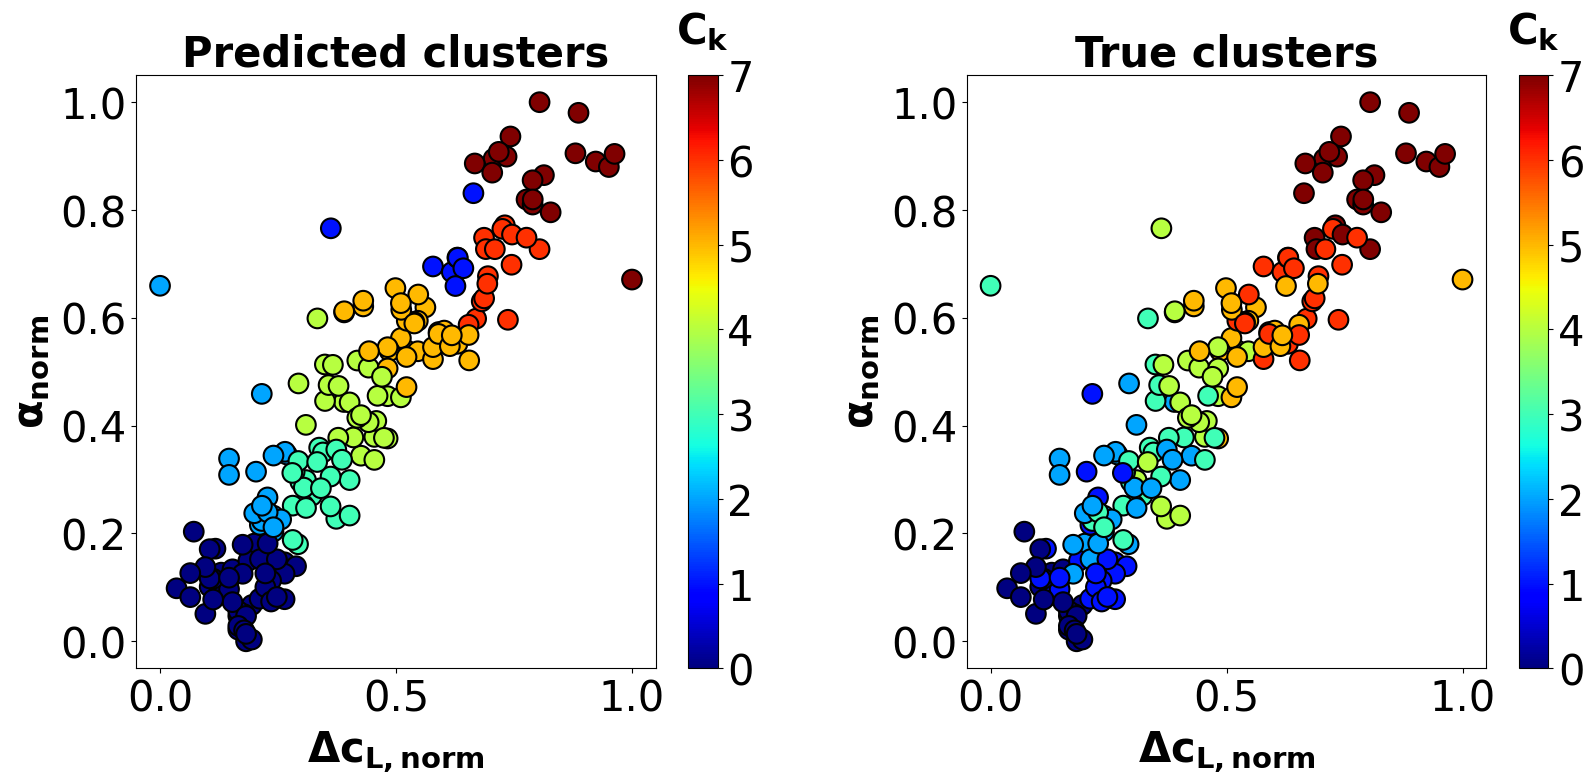

In [37]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(18, 9)
fig.tight_layout(pad = 10)

#Plot predicted clusters
cm = plt.cm.get_cmap('jet')

cluster_labels = np.zeros(X_train.shape[0], dtype = int)
for classification in model.classifications:
    for index in model.classifications_ind[classification]:
        cluster_labels[index] = classification

im1 = ax[0].scatter(X_train[:, 0], X_train[:, 1], s = 200, c = cluster_labels, cmap = cm, edgecolors = "black", linewidths = 1.5)

cbar1 = fig.colorbar(im1, ax=ax[0])
cbar1.ax.tick_params(labelsize=30)
cbar1.ax.set_title(r'$\bf{C_{k}}$', fontsize = 30, fontweight='bold', rotation=0, pad = 23)

ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[0].set_xlabel(r'$\bf{Δc_{L,norm}}$', fontsize = 30, labelpad = 6)
ax[0].set_ylabel(r'$\bf{α_{norm}}$', fontsize = 30, labelpad = 6)
ax[0].set_title('Predicted clusters', fontsize = 30, fontweight='bold')

#Plot true clusters
cm = plt.cm.get_cmap('jet')

im2 = ax[1].scatter(X_train[:, 0], X_train[:, 1], s = 200, c = data_porosity_label_train, cmap = cm, edgecolors = "black", linewidths = 1.5)

cbar2 = fig.colorbar(im2, ax=ax[1])
cbar2.ax.tick_params(labelsize=30)
cbar2.ax.set_title(r'$\bf{C_{k}}$', fontsize = 30, fontweight='bold', rotation=0, pad = 23)

ax[1].tick_params(axis='both', which='major', labelsize=30)
ax[1].set_xlabel(r'$\bf{Δc_{L,norm}}$', fontsize = 30, labelpad = 6)
ax[1].set_ylabel(r'$\bf{α_{norm}}$', fontsize = 30, labelpad = 6)
ax[1].set_title('True clusters', fontsize = 30, fontweight='bold')

## **Functions for the creation of confusion matrices.**

In [38]:
def Coons(n_ksi, n_h):
    #Definition of function that partitions a domain using Coons partitioning
    nele = n_ksi*n_h
    nnodes = (n_ksi+1)*(n_h+1)
    ele = np.zeros((nele,4),dtype=int)
    nodes = np.zeros((nnodes,2))
    for i in range(0, n_ksi):
        for j in range(0, n_h):
            ele[j*n_ksi+i,0]=(n_ksi+1)*j+i+1
            ele[j*n_ksi+i,1]=ele[j*n_ksi+i,0]+1;
            ele[j*n_ksi+i,2]=ele[j*n_ksi+i,1]+n_ksi+1;
            ele[j*n_ksi+i,3]=ele[j*n_ksi+i,2]-1;

            nodes[ele[j*n_ksi+i,0]-1,:]=[i/n_ksi, j/n_h]
            nodes[ele[j*n_ksi+i,1]-1,:]=[(i+1)/n_ksi, j/n_h]
            nodes[ele[j*n_ksi+i,2]-1,:]=[(i+1)/n_ksi, (j+1)/n_h]
            nodes[ele[j*n_ksi+i,3]-1,:]=[i/n_ksi, (j+1)/n_h]
    mesh={'elements':ele, 'nodesC':nodes}

    return mesh;

def StraightLineDiv(startp, endp, div):
    ""
    if startp[0]!=endp[0]:
        X = startp[0]*(1-div)+endp[0]*div
        Y = startp[1]
    else:
        X = startp[0]
        Y = startp[1]*(1-div)+endp[1]*div
    p=np.array([X, Y])
    return p;

def ConfusionMatrix(k, classifications_ind, data_porosity_label):

    W = k #Matrix width
    H = k #Matrix height
    n_ksi = k #Number of divisions for matrix width
    n_h = k #Number of divisions for matrix height

    A=np.array([0, 0])
    B=np.array([W, 0])
    C=np.array([W, H])
    D=np.array([0, H])
    mesh = Coons(n_ksi, n_h)
    ele=mesh['elements'] #Array to store each element
    nodesC=mesh['nodesC'] #Nodal coordinates

    nodes = np.zeros(((n_ksi+1)*(n_h+1),2))

    for i in range(0, n_ksi*n_h):
        for j in range(0, 4):
            ksi=nodesC[ele[i,j]-1, 0]
            h=nodesC[ele[i,j]-1, 1]
            E0_ksi=1-ksi
            E1_ksi=ksi
            E0_h=1-h
            E1_h=h
            AB=StraightLineDiv(A, B, ksi)
            BC=StraightLineDiv(B, C, h)
            CD=StraightLineDiv(D, C, ksi)
            DA=StraightLineDiv(A, D, h)
            nodes[ele[i,j]-1,0]=E0_ksi*DA[0]+E1_ksi*BC[0]+E0_h*AB[0]+E1_h*CD[0]-E0_ksi*E0_h*A[0]-E1_ksi*E0_h*B[0]-E0_ksi*E1_h*D[0]-E1_ksi*E1_h*C[0]
            nodes[ele[i,j]-1,1]=E0_ksi*DA[1]+E1_ksi*BC[1]+E0_h*AB[1]+E1_h*CD[1]-E0_ksi*E0_h*A[1]-E1_ksi*E0_h*B[1]-E0_ksi*E1_h*D[1]-E1_ksi*E1_h*C[1]

        X=np.array([nodes[ele[i,0]-1, 0], nodes[ele[i,1]-1, 0], nodes[ele[i,2]-1, 0], nodes[ele[i,3]-1, 0], nodes[ele[i,0]-1, 0]])
        Y=np.array([nodes[ele[i,0]-1, 1], nodes[ele[i,1]-1, 1], nodes[ele[i,2]-1, 1], nodes[ele[i,3]-1, 1], nodes[ele[i,0]-1, 1]])

    mesh['nodes']=nodes

    fig = plt.figure(figsize = (11.25, 9))
    ax = plt.axes

    #Calculation of clustering accuracy over all the porosity levels and of the clustering accuracy for each porosity level independently.
    #The total clustering accuracy is calculated as the sum of the data points lying in the diagonal of the confusion matrix divided by the total
    # number of data points. The clustering accuracy at each porosity level is defined as the number of datapoints corrrectly clustered to a porosity
    #level divided by the total number of data points corresponding to this porosity level.
    accuracy = 0
    porosity_label_instances_all = np.array([])
    accuracy_cluster = np.zeros(k, )
    max_instances = 0
    for classification in classifications_ind:
        porosity_label_instances = np.zeros(k, dtype = int)
        for i in range(len(classifications_ind[classification])):
            for j in range(k):
                if data_porosity_label[classifications_ind[classification][i]] == j:
                  porosity_label_instances[j] = porosity_label_instances[j] + 1
                  if classification == j:
                    accuracy = accuracy + 1
                    accuracy_cluster[j] = accuracy_cluster[j] + 1
                  break

        porosity_label_instances_all = np.append(porosity_label_instances_all, porosity_label_instances)

    data_porosity_label_unique = np.unique(data_porosity_label)
    max_instances = 0
    for i in range(data_porosity_label_unique.shape[0]):
        if max_instances < data_porosity_label[data_porosity_label == data_porosity_label_unique[i]].shape[0]:
          max_instances = data_porosity_label[data_porosity_label == data_porosity_label_unique[i]].shape[0]

    cm = plt.cm.get_cmap('jet')

    minv, maxv = 0, max_instances
    norm = plt.Normalize(minv, maxv)
    sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
    sm.set_array([])

    i = 0
    for element in mesh['elements']:

        x_or = mesh['nodes'][element[0] - 1][0] - 0.5
        y_or = mesh['nodes'][element[0] - 1][1] - 0.5
        dx = mesh['nodes'][element[1] - 1][0] - mesh['nodes'][element[0] - 1][0]
        dy = mesh['nodes'][element[3] - 1][1] - mesh['nodes'][element[0] - 1][1]
        rectangle = patches.Rectangle((x_or, y_or), dx, dy, facecolor=cm(norm(porosity_label_instances_all[i])), edgecolor = "black")
        s = plt.gca().add_patch(rectangle)
        plt.fill()

        xc = np.mean([mesh['nodes'][element[0] - 1][0], mesh['nodes'][element[1] - 1][0], mesh['nodes'][element[2] - 1][0], mesh['nodes'][element[3] - 1][0]]) - 0.7
        yc = np.mean([mesh['nodes'][element[0] - 1][1], mesh['nodes'][element[1] - 1][1], mesh['nodes'][element[2] - 1][1], mesh['nodes'][element[3] - 1][1]]) - 0.7

        if porosity_label_instances_all[i] >= 10:
          plt.annotate(str(int(porosity_label_instances_all[i])), xy=(xc - 0.1, yc), color = 'black', fontsize = 30)
        else:
          plt.annotate(str(int(porosity_label_instances_all[i])), xy=(xc, yc), color = 'black', fontsize = 30)

        i = i + 1

    accuracy = accuracy / len(data_porosity_label_train)

    for i in range(k):
        accuracy_cluster[i] = accuracy_cluster[i] / len(np.where(data_porosity_label == i)[0])

    plt.xlabel("Porosity label", fontsize = 30)
    plt.ylabel("Cluster", fontsize = 30)

    plt.xticks(np.arange(0 , k, 1), fontsize = 30)
    plt.yticks(np.arange(0 , k, 1), fontsize = 30)

    cbar = plt.colorbar(sm)
    cbar.ax.tick_params(labelsize=30)
    cbar.ax.set_title('#Data points', fontsize = 30, fontweight='bold', rotation=0, pad = 23)

    plt.xlim([-0.5, k - 0.5])
    plt.ylim([-0.5, k - 0.5])

    return accuracy, accuracy_cluster;

## **Confusion matrix for the training set.**

<ipython-input-38-071a2c81fea5>:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')
<ipython-input-38-071a2c81fea5>:139: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


The training accuracy is 0.526042
The training accuracy for cluster 0 is 1.000000
The training accuracy for cluster 1 is 0.000000
The training accuracy for cluster 2 is 0.370370
The training accuracy for cluster 3 is 0.434783
The training accuracy for cluster 4 is 0.500000
The training accuracy for cluster 5 is 0.739130
The training accuracy for cluster 6 is 0.391304
The training accuracy for cluster 7 is 0.750000


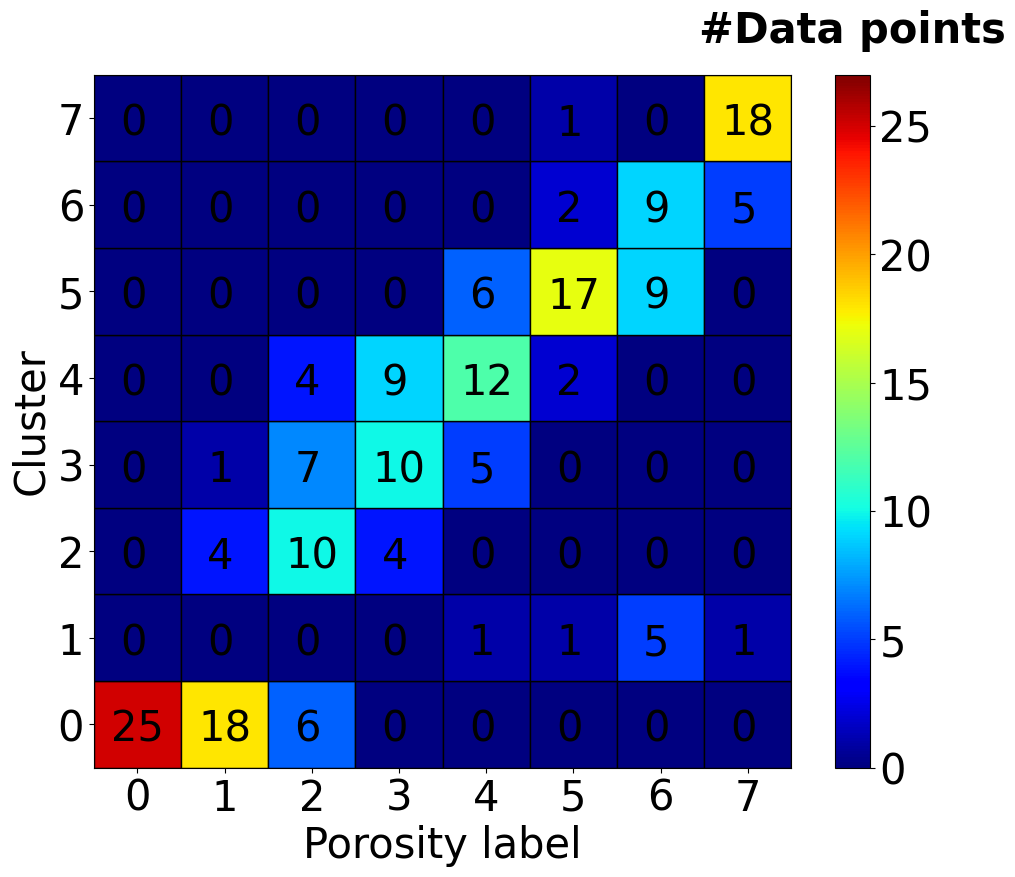

In [39]:
classifications_ind_train = model.classifications_ind

accuracy, accuracy_cluster = ConfusionMatrix(k, classifications_ind_train, data_porosity_label_train)

print("The training accuracy is %f" %(accuracy))
for i in range(len(accuracy_cluster)):
    print("The training accuracy for cluster %d is %f" %(i, accuracy_cluster[i]))

## **Metrics for the evaluation of the clustering performance on the training set.**

In [40]:
predicted_labels_train = np.zeros(data_porosity_label_train.shape[0], )
for classification in classifications_ind_train:
    for i in classifications_ind_train[classification]:
        predicted_labels_train[i] =  classification

pearson_corr_coeff_train = scipy.stats.pearsonr(data_porosity_label_train, predicted_labels_train)[0] #Calculation of Pearson correlation coefficient
mse_train = mean_squared_error(data_porosity_label_train, predicted_labels_train) #Calculation of mean squared error (MSE)

print("The Pearson correlation in the training se is %f" %(pearson_corr_coeff_train))
print("The MSE in the training se is %f" %(mse_train))

The Pearson correlation in the training se is 0.862271
The MSE in the training se is 1.588542


## **Implement the model to identify clusters in the testing set**

In [41]:
classifications_test, classifications_ind_test = model.predict(X_test)

## **Confusion matrix for the testing set.**

<ipython-input-38-071a2c81fea5>:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')
<ipython-input-38-071a2c81fea5>:139: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


The testing accuracy is 0.119792
The testing accuracy for cluster 0 is 0.800000
The testing accuracy for cluster 1 is 0.000000
The testing accuracy for cluster 2 is 0.000000
The testing accuracy for cluster 3 is 0.571429
The testing accuracy for cluster 4 is 0.833333
The testing accuracy for cluster 5 is 0.571429
The testing accuracy for cluster 6 is 0.142857
The testing accuracy for cluster 7 is 0.833333


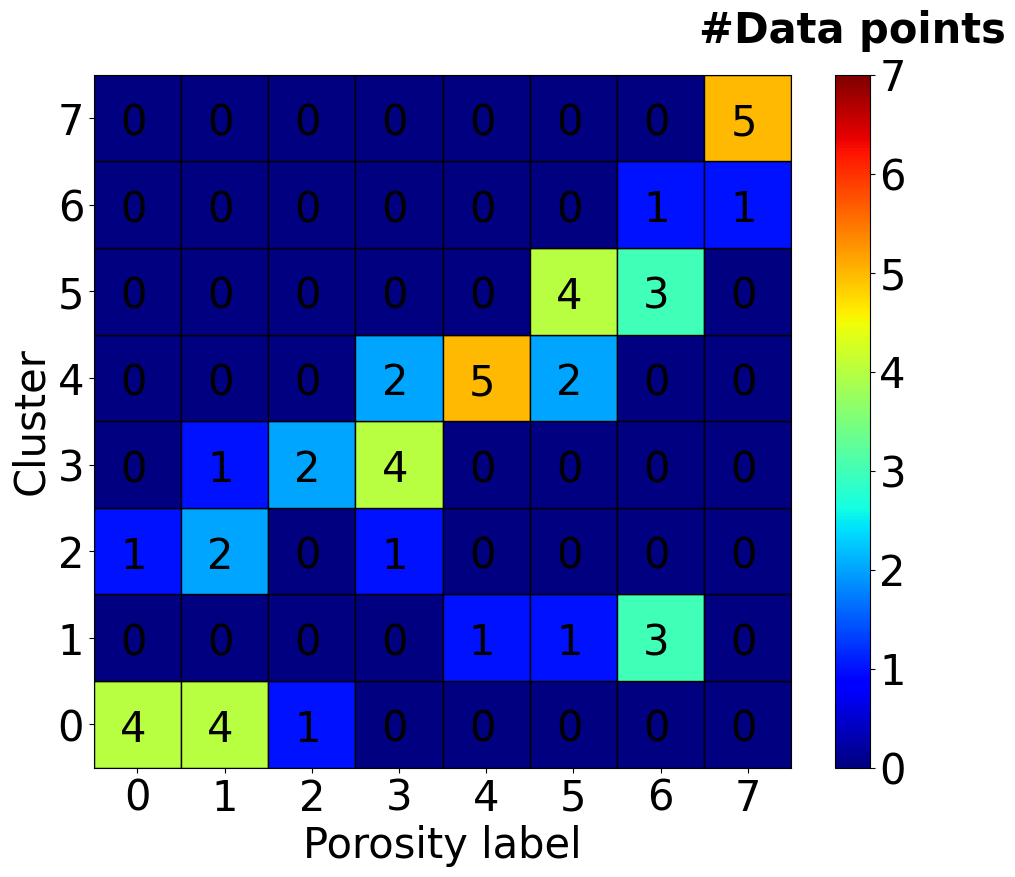

In [42]:
accuracy, accuracy_cluster = ConfusionMatrix(k, classifications_ind_test, data_porosity_label_test)

print("The testing accuracy is %f" %(accuracy))
for i in range(len(accuracy_cluster)):
    print("The testing accuracy for cluster %d is %f" %(i, accuracy_cluster[i]))

## **Metrics for the evaluation of the clustering performance on the testing set.**

In [43]:
predicted_labels_test = np.zeros(data_porosity_label_test.shape[0], )
for classification in classifications_ind_test:
    for i in classifications_ind_test[classification]:
        predicted_labels_test[i] =  classification

pearson_corr_coeff_test = scipy.stats.pearsonr(data_porosity_label_test, predicted_labels_test)[0] #Calculation of Pearson correlation coefficien
mse_test = mean_squared_error(data_porosity_label_test, predicted_labels_test) #Calculation of mean squared error (MSE)

print("The Pearson correlation in the testing set is %f" %(pearson_corr_coeff_test))
print("The MSE in the testing set is %f" %(mse_test))

The Pearson correlation in the testing set is 0.760952
The MSE in the testing set is 2.687500
